# Logist Regression

### 1.Classification with logistic regression and the sigmoid

We’d like to have an equation we can give all of our features and it will predict the class. In the two-class case, the function will spit out a 0 or a 1.

This function is called the sigmoid. The **sigmoid** is given by the following equation:

## $\sigma(z) = \frac{1}{1+e^{-z}}$

Two plots of the sigmoid are given in figure 5.1. At 0 the value of the sigmoid is 0.5. For increasing values of x, the sigmoid will approach 1, and for decreasing values of x, the sigmoid will approach 0. On a large enough scale (the bottom frame of figure 5.1), the sigmoid looks like a step function.
For the logistic regression classifier we’ll take our features and multiply each one by a weight and then add them up. This result will be put into the sigmoid, and we’ll get a number between 0 and 1. Anything above 0.5 we’ll classify as a 1, and anything below 0.5 we’ll classify as a 0. You can also think of logistic regression as a proba- bility estimate.

![](picture/09.png)

### 2.Using optimization to find the best regression coefficients

The input to the sigmoid function described will be z, where z is given by the following:

$z=w_0x_0 + w_1x_1+w_2x_2 + \cdots + w_nx_n$

In vector notation we can write this as

$z=w^{T}x$

All that means is that we have two vectors of numbers and we’ll multiply each element and add them up to get one number.The vector x is our input data, and we want to find the best coefficients w, so that this clas- sifier will be as successful as possible.

### 2.1 Gradient ascent

The first optimization algorithm we’re going to look at is called **gradient ascent**. Gra-dient ascent is based on the idea that if we want to find the maximum point on a func- tion, then the best way to move is in the direction of the gradient. We write the gradient with the symbol $\bigtriangledown$ and the gradient of a function $f(x,y)$ is given by the equation 

$\bigtriangledown f(x,y) = \begin{pmatrix} \frac{\partial f(x,y)}{\partial x}
\\  \frac{\partial f(x,y)}{\partial y}
\end{pmatrix}$

This gradient means that we'll move in the x direction by amount \frac{\partial f(x,y)}{\partial x} and in the y direction \frac{\partial f(x,y)}{\partial y}.

The function f(x,y) needs to be defined and differentiable around the points
where it’s being evaluated.

![](picture/10.png)

The gradient operator will always point in the direction of the greatest increase. 
The magnitude, or step size, we’ll take is given by the parameter $\alpha$ 

In vector notation we can write the gradient ascent algorithm as 

$w := w+ \alpha \bigtriangledown_w f(w)$

**Gradient descent:**
Perhaps you’ve also heard of gradient descent. It’s the same thing as gradient as- cent, except the plus sign is changed to a minus sign. We can write this as

$w := w- \alpha \bigtriangledown_w f(w)$

With gradient descent we’re trying to minimize some function rather than maximize it.

Let’s put this into action on our logistic regression classifier and some Python. First, we need a dataset. Consider the dataset plotted in figure 5.3.

![](picture/11.png)

### 2.2 Train: using gradient ascent to find the best parameters

There are 100 data points in figure 5.3. Each point has two numeric features: X1 and X2. We’ll try to use gradient ascent to fit the best parameters for the logistic regression model to our data. We’ll do this by finding the best weights for this given dataset.

**PS:** click [here](https://github.com/woaij100/DeeplearningByAndrew_Ng/blob/master/Neural%20network%20foundation/2.9%20Logistics%20Regression%20Gradient%20descent.md) to learn LG gradient descent

In [1]:
import numpy as np
import pprint

In [2]:
def loadData():
    """
    loading data 
    returns:
        dataMat:data matrix.
        labelMat: classes label.
    """
    dataMat = []
    labelMat = []
    fr = open('data_set/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        # For the convenience of calculation,so we set "x0" = 1，as same as bias.
        dataMat.append([1.,float(lineArr[0]),float(lineArr[1])]) 
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [3]:
def sigmoid(inX):
    """
    create sigmoid function
    return:
        sigmoid function
    """
    return 1./(1+np.exp(-inX))

In [4]:
def gradAscent(dataMatIn,classLabels):
    """
    First, The dataMatIn and classLabels need changed to numpy array.
    """
    dataMatrix = np.matrix(dataMatIn)
    print("dataMatrix shape is : ",dataMatrix.shape)
    labelMat = np.matrix(classLabels).transpose()
    m,n = dataMatrix.shape
    
    alpha = 0.001 # set alpha 
    maxCycles = 500 # set number of epoch
    weights = np.ones((n,1)) # set initialization weights
    
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights) # elements by multiplication ont "Matrix multiplication"
        error = (labelMat - h)
        # if you do not know whta is mean, then you can see PS
        weights = weights + alpha * dataMatrix.transpose() * error  # caculate gradicent ascent.
    return weights

In [5]:
dataArr,labelMat = loadData()
display("dataArr is : (top10) ", dataArr[0:10]) 
print("label is : ",labelMat )

'dataArr is : (top10) '

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677],
 [1.0, 0.406704, 7.067335],
 [1.0, 0.667394, 12.741452],
 [1.0, -2.46015, 6.866805],
 [1.0, 0.569411, 9.548755],
 [1.0, -0.026632, 10.427743]]

label is :  [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]


In [6]:
weigths = gradAscent(dataMatIn=dataArr,classLabels=labelMat)
print(weigths,type(weigths))

dataMatrix shape is :  (100, 3)
[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]] <class 'numpy.matrixlib.defmatrix.matrix'>


In [7]:
print(weigths.getA()[0])

[4.12414349]


### 2.3 Analyze: plotting the decision boundary

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plotBestFit(wei):
    """
    Plot the best figure
    """
    weigths = wei.getA() # get array in weigths
    dataMat,labelMat = loadData()
    dataArr = np.array(dataMat)
    n = dataArr.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # split label 1 to  xcord1, ycord1 Or split label2 to  xcord2, ycord2
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c="red",marker="s")
    ax.scatter(xcord2,ycord2,s=30,c="blue")
    x1 = np.arange(-3.,3.,0.1)
    # The results derived from “0 = w_0x_0 + w_1x_1 + w_2x_2” are as follows。
    x2 = (-weigths[0] * 1 - weigths[1] * x1) / weigths[2]
    
    ax.plot(x1,x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

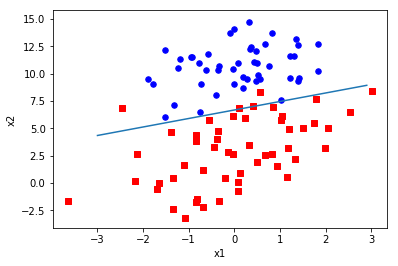

In [10]:
plotBestFit(weigths)

input of 0 was our center line to split things classified as a 1 and a 0. you can see sigmoid function.

I set $0 = w_0x_0 + w_1x_1 + w_2x_2 $ and solved for X2 in terms of X1 (remember, X0 was 0).

**Note:**I set the sigmoid function to 0

### 2.4 Stochastic gradient ascent


The previous optimization algorithm, gradient ascent, uses the whole dataset on each update. This was fine with 100 examples, but with billions of data points containing thousands of features, it’s unnecessarily expensive in terms of computational resources. An alternative to this method is to update the weights using only one instance at a time. This is known as **stochastic gradient ascent**. Stochastic gradient ascent is an example of an online learning algorithm. This is known as online because we can incrementally update the classifier as new data comes in rather than all at once. The all-at-once method is known as **batch processing**.


In [11]:
def stocGradAscent0(dataMatrix, classLabels):
    """
    Implement Stochastic gradient ascent.
    return:
        weigths: weigth matrix.
    """
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        # One of the random training samples performs an operation.
        # means: every for loop,have one take in "gradient ascent".
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

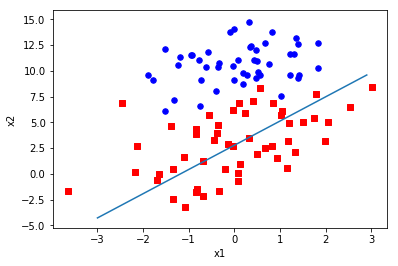

In [12]:
dataArr,labelMat = loadData()
weigths = stocGradAscent0(np.array(dataArr),labelMat)
plotBestFit(np.matrix(weigths).reshape(3,1))

The resulting best-fit line is OK but cer- tainly not as great as the previous example from gradient ascent. If we were to use this as our classifier, we’d misclassify one-third of the results.

Let's look at weigths

In [13]:
def stocGradAscent1(dataMatrix, classLabels):
    """
    Implement Stochastic gradient ascent.
    return:
        weigths: weigth matrix.
    """
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    x0 = []
    x1 = []
    x2 = []
    for i in range(200):
        for i in range(m):
            x0.append(-weights[0])
            x1.append(-weights[1])
            x2.append(-weights[2])
            # One of the random training samples performs an operation.
            # means: every for loop,have one take in "gradient ascent".
            h = sigmoid(np.sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
    
    fig = plt.figure()
    ax0 = fig.add_subplot(311)
    ax0.plot(x0,c="red")
    ax0.set_ylabel("X0")
    ax1 = fig.add_subplot(312)
    ax1.plot(x1,c="blue")
    ax1.set_ylabel("X1")
    ax2 = fig.add_subplot(313)
    ax2.plot(x2,c="green")
    ax2.set_ylabel("X2")
    plt.tight_layout()
    plt.show()
    return weights

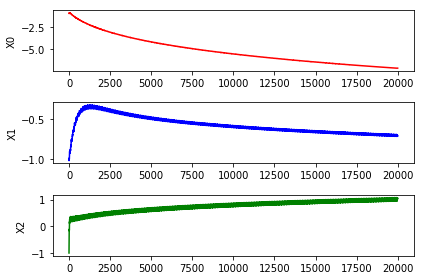

In [14]:
dataArr,labelMat = loadData()
weigths = stocGradAscent1(np.array(dataArr),labelMat)

This picture show  how the weights change in our simple stochastic gradient ascent algorithm over 200 iterations of the algorithm. Weight 2, labeled X2 in this picture, takes only 150 cycles to reach a steady value, but weights 1 and 0 take much longer.

The stochastic gradient ascent algorithm of listing "Modified stochastic gradient ascent" has been modified to address the problems shown in this figure , and this is given in the following listing.

### 2.5 Modified stochastic gradient ascent

In [15]:
def stocGradAscent1(dataMatrix,classLabels,numIter = 150):
    m,n = dataMatrix.shape
    weights = np.ones(n)
    x0 = []
    x1 = []
    x2 = []
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            x0.append(-weights[0])
            x1.append(-weights[1])
            x2.append(-weights[2])
            # Fractional attenuation
            alpha = (4 / (1. + j + i)) + 0.01 # every loop can be change alpha.
            
            # random calculate one at the h,abot 5 lines.
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] -h 
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
            # end random calculate.
    # plot parameters of the weights.   
    fig = plt.figure()
    ax0 = fig.add_subplot(311)
    ax0.plot(x0,c="red")
    ax0.set_ylabel("X0")
    ax1 = fig.add_subplot(312)
    ax1.plot(x1,c="blue")
    ax1.set_ylabel("X1")
    ax2 = fig.add_subplot(313)
    ax2.plot(x2,c="green")
    ax2.set_ylabel("X2")
    plt.tight_layout()
    plt.show()
    
    return weights


    

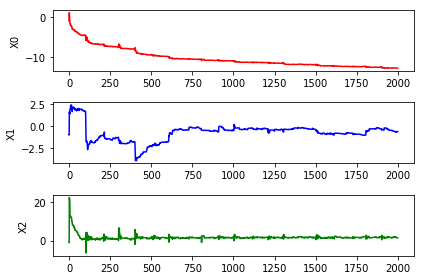

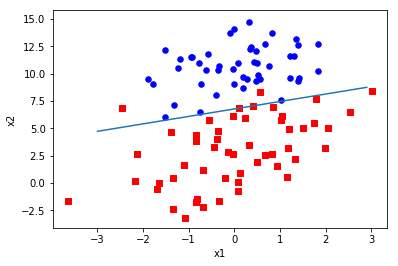

In [16]:
dataArr,labelMat = loadData()
weights = stocGradAscent1(dataMatrix = np.array(dataArr),classLabels = labelMat,numIter = 20)
plotBestFit(np.matrix(weigths).reshape(3,1))

### 2.6 part 2 Summary

- Coefficient convergence in stocGradAscent1() with random vector selection and decreasing alpha. This method is much faster to converge than using a fixed alpha.
- You should see a plot similar to that in first figure . The results are similar to those of GradientAscent(), but far fewer calculations were involved.
- For more information on stochastic gradient ascent please see [here](https://zhuanlan.zhihu.com/p/28060786)

###  3 Example: estimating horse fatalities from colic

In [22]:
def classifyVector(inX,input_weigths):
    """
    classify 0,1
    returns:
        1: is live
        0: is die
    """
    prob = sigmoid(np.sum(inX*input_weigths))
    
    if prob > 0.5:
        return 1
    else:
        return 0

In [23]:
def stocGradAscent1(dataMatrix,classLabels,numIter = 150):
    """
    create stochastic Gradient ascent.
    parameters:
        dataMatrix: input data it's a matrix
        classLabels: class labels
        numIter: iterations
        
    return:
        the best weights
    """
    m,n = dataMatrix.shape
    weights = np.ones(n)

    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # Fractional attenuation
            alpha = (4 / (1. + j + i)) + 0.01 # every loop can be change alpha.
            
            # random calculate one at the h,abot 5 lines.
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            # start SGD
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] -h 
            weights = weights + alpha * error * dataMatrix[randIndex]
            # end SGD
            del(dataIndex[randIndex])
            # end random calculate.
    return weights


In [33]:
def colicTest():
    """
    create model
    return :
        errors: predict error label. 
    """
    
    # star loading training data , about 11 lines.
    frTrain = open('data_set/horseColicTraining.txt')
    frTest = open('data_set/horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr) # append data in training data,like[[1,2,3...],[4,5,6...]]
        trainingLabels.append(float(currLine[21])) # currLine[21] is data's label
    
    # end loading data.
    
    # start training data, and get the best weights
    trainingWeights = stocGradAscent1(np.array(trainingSet),trainingLabels,500)
    
    # testing data and caculate error rate with one epoch.
    errorCount = 0
    numTestVec = 0.
    for line in frTest.readlines():
        numTestVec += 1.
        cyrrList = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(cyrrList[i]))
        # if predict value(label) is not equal true label, then "error" plus 1
        if classifyVector(inX=np.array(lineArr),input_weigths=trainingWeights) != float(cyrrList[21]):
            errorCount += 1
    # calculate mean error rate
    errorRate = float(errorCount)/numTestVec
    print("The error rate of this test is: {}".format(errorRate))
    return errorRate

In [34]:
def multiTest():
    """
    epoch is 10, means: runing 10s. and calculate mean error rate.
    """
    numTests = 10
    errorSum = 0.
    for k in range(numTests):
        errorSum  += colicTest()
    print("after {} iterations the average error rate is:{}".format(numTests,errorSum/float(numTests)))

In [35]:
multiTest()

/Users/huwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.31343283582089554
The error rate of this test is: 0.2835820895522388
The error rate of this test is: 0.3880597014925373
The error rate of this test is: 0.43283582089552236
The error rate of this test is: 0.417910447761194
The error rate of this test is: 0.2537313432835821
The error rate of this test is: 0.40298507462686567
The error rate of this test is: 0.34328358208955223
The error rate of this test is: 0.417910447761194
after 10 iterations the average error rate is:0.3626865671641791


This result is OK.because, this wasn't bad with over 30% of the values missing.

### 4. Summary

- Logistic regression is finding best-fit parameters to a nonlinear function called the sig- moid. Methods of optimization can be used to find the best-fit parameters. Among the optimization algorithms, one of the most common algorithms is gradient ascent. Gra- dient ascent can be simplified with stochastic gradient ascent.
- Stochastic gradient ascent can do as well as gradient ascent using far fewer comput- ing resources. In addition, stochastic gradient ascent is an online algorithm; it can update what it has learned as new data comes in rather than reloading all of the data as in batch processing.
- One major problem in machine learning is how to deal with missing values in the data. There’s no blanket answer to this question. It really depends on what you’re doing with the data. There are a number of solutions, and each solution has its own advantages and disadvantages.
- In the next chapter we’re going to take a look at another classification algorithm similar to logistic regression. The algorithm is called support vector machines and is considered one of the best stock algorithms.

- "Very Importent code:"

```python
h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
error = classLabels[randIndex] -h 
weights = weights + alpha * error * dataMatrix[randIndex]
```